## Exploratory Data Analysis

**Roles to Explore:**

In [3]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**Filter for US Data Analyst roles**

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

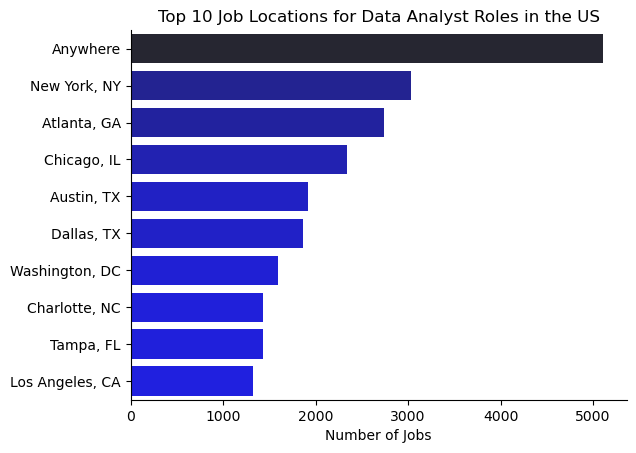

In [8]:
df_DA_US['job_location'].value_counts().head(10).to_frame()
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

# Plotting the top 10 job locations for Data Analyst roles in the US
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 Job Locations for Data Analyst Roles in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


**Job Opportunities**

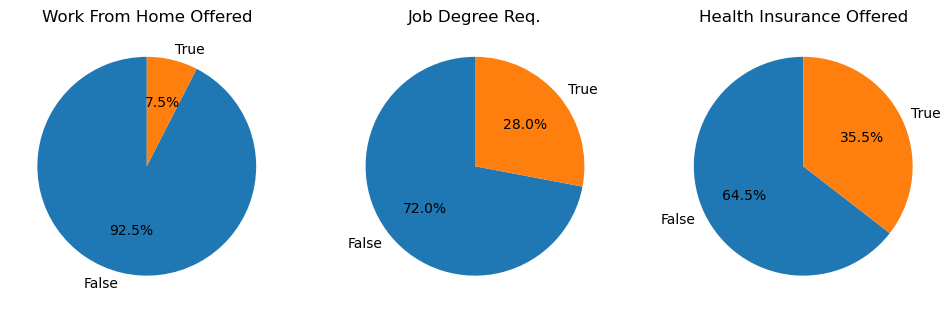

In [10]:
# rewrite this with a for loop
dict_column = {
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=df[column].value_counts().index)
    ax[i].set_title(title)


plt.show()

**Companies to Explore:**

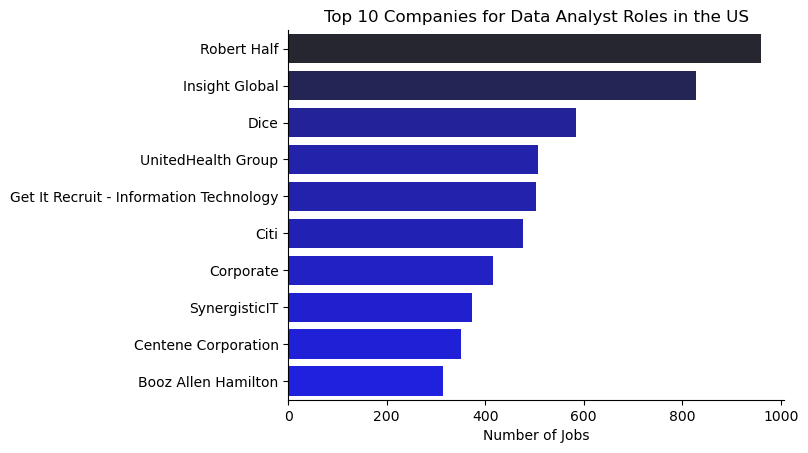

In [ ]:
df_DA_US['company_name'].value_counts().head(10).to_frame()
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

# Plotting the top 10 job locations for Data Analyst roles in the US
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 Companies for Data Analyst Roles in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()
